In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)

## About this file

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [5]:
base = pd.read_csv("mushrooms.csv")

In [6]:
base.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
base.shape

(8124, 23)

In [8]:
# Verificando nulos
base.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
class MultiColumnLabelEncoder():
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [40]:
mle = MultiColumnLabelEncoder(base.columns)

In [66]:
base_2 = mle.fit_transform(base)

base_2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


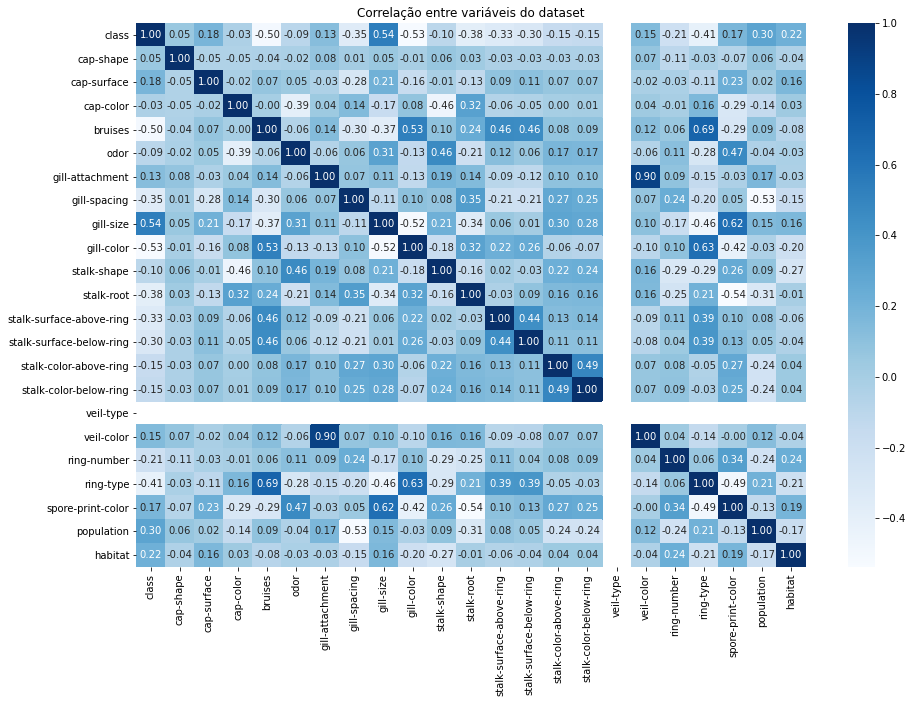

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

sns.heatmap(
    base_2.corr(),
    annot = True,
    fmt = '.2f',
    cmap='Blues'
)

plt.title('Correlação entre variáveis do dataset')

plt.show()

In [71]:
base_2.corr()[["class"]].sort_values(by="class")

,class
gill-color,-0.530566
bruises,-0.501530
ring-type,-0.411771
stalk-root,-0.379361
gill-spacing,-0.348387
stalk-surface-above-ring,-0.334593
stalk-surface-below-ring,-0.298801
ring-number,-0.214366
stalk-color-above-ring,-0.154003
stalk-color-below-ring,-0.146730


In [73]:
import numpy as np
np.abs(base_2.corr()[["class"]]).sort_values(by="class", ascending=False)

,class
class,1.000000
gill-size,0.540024
gill-color,0.530566
bruises,0.501530
ring-type,0.411771
stalk-root,0.379361
gill-spacing,0.348387
stalk-surface-above-ring,0.334593
stalk-surface-below-ring,0.298801
population,0.298686


In [98]:
X = base_2[["gill-size", "gill-color", "bruises", "ring-type"]]
y = base_2['class']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y , shuffle=True, test_size=0.25, random_state=42)

In [100]:
KNN = KNeighborsClassifier()

In [101]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [120]:
pred_y = KNN.predict(X_test)

In [103]:
reportKNN = classification_report(y_test, pred_y, output_dict=True)

In [104]:
crKNN = pd.DataFrame(reportKNN).transpose()

In [81]:
crKNN

,precision,recall,f1-score,support
0,0.841667,0.874038,0.857547,1040.000000
1,0.862250,0.827447,0.844490,991.000000
accuracy,0.851305,0.851305,0.851305,0.851305
macro avg,0.851958,0.850743,0.851019,2031.000000
weighted avg,0.851710,0.851305,0.851176,2031.000000


In [105]:
crKNN

,precision,recall,f1-score,support
0,0.933925,0.910577,0.922103,1040.000000
1,0.908555,0.932392,0.920319,991.000000
accuracy,0.921221,0.921221,0.921221,0.921221
macro avg,0.921240,0.921484,0.921211,2031.000000
weighted avg,0.921546,0.921221,0.921232,2031.000000


In [97]:
crKNN

,precision,recall,f1-score,support
0,0.954128,1.000000,0.976526,1040.000000
1,1.000000,0.949546,0.974120,991.000000
accuracy,0.975382,0.975382,0.975382,0.975382
macro avg,0.977064,0.974773,0.975323,2031.000000
weighted avg,0.976511,0.975382,0.975352,2031.000000


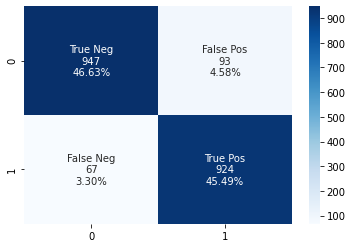

In [121]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_y)

group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')